<h1 style="font-size:300%; background-color:#ffe4b5; color:#4b0082; text-align:center; line-height : 60px;">
Análisis de componentes principales</h1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>John Alejandro Hernández Mora</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; ">Oscar Iván Rojas Balcázar<br></p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; ">Juan Camilo Santana Salgado<br></p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>Ingeniería Mecatrónica</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Mayo de 2021</p>

In [1]:
%matplotlib inline
import cv2
import numpy as np
import os
from IPython.display import Image
from matplotlib import pyplot as plt
from pylab import plot,subplot,axis,stem,show,figure

### Recopilación de banco de imágenes para entrenamiento:

In [2]:
#Ciclo para obtener banco de imágenes
figs=[]

with os.scandir('C:/Users/juanc/Documents/UNAL/2021 - 1/TIA/Proyecto/Bases de datos/Dataset 2/datasets/train_folder/0/') as nms:    
    for nm in nms:
        fig=cv2.imread("C:/Users/juanc/Documents/UNAL/2021 - 1/TIA/Proyecto/Bases de datos/Dataset 2/datasets/train_folder/0/"+nm.name,0)
        fig=cv2.GaussianBlur(fig,(3,3),0)
        figs.append(fig)

In [3]:
#Creación de la matriz de datos

nfigs=len(figs)
print('Número de ejemplares de entrenamiento: '+str(nfigs))

Data=np.empty((nfigs,4096))
x=0 #contador
for fig in figs:
    Data[x]=fig.reshape(1,4096)
    x=x+1

Número de ejemplares de entrenamiento: 1238


<h2 style="text-align:center">Análisis de componentes principales (PCA)</h2>

(1238, 4096)
(1238, 1238)
(1238, 4096)


(<matplotlib.axes._subplots.AxesSubplot at 0x2bfb93a5e20>,
 Text(0.5, 1.0, 'Eigenface 500'),
 (-0.5, 63.5, 63.5, -0.5))

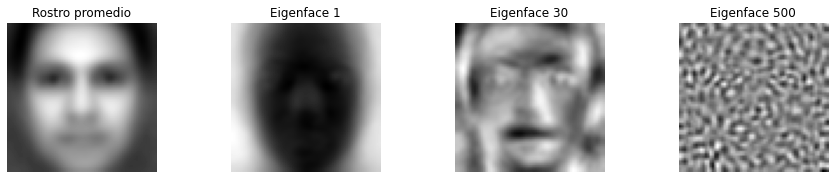

In [4]:
#Análisis de Componentes Principales
Xpca=Data

#Cálculo de media
Xavg=np.mean(Xpca,axis=0)
Xavg=Xavg.reshape(1,Xavg.size)

#Centrado de datos en el origen
meanM=np.tile(Xavg,(Xpca.shape[0],1)) 
B=Xpca-meanM 

#Implementación de PCA (desde SVD)
Upca,Spca,VTpca=np.linalg.svd(B/np.sqrt(Xpca.shape[0]),full_matrices=0)

print(B.shape)
print(Upca.shape)
print(VTpca.shape)

plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(Xavg.reshape(64,64),cmap='gray'),plt.title('Rostro promedio'),plt.axis('off')
plt.subplot(142),plt.imshow(np.reshape(VTpca[1,:],(64,64)),cmap='gray'),plt.title('Eigenface 1'),plt.axis('off')
plt.subplot(143),plt.imshow(np.reshape(VTpca[30,:],(64,64)),cmap='gray'),plt.title('Eigenface 30'),plt.axis('off')
plt.subplot(144),plt.imshow(np.reshape(VTpca[500,:],(64,64)),cmap='gray'),plt.title('Eigenface 500'),plt.axis('off')

#ESCOJA LAS CARACTERISTICAS A EVALUAR ANTES DE USAR PCA.

<p style="text-align:justify">Para este primer análisis, las eigenfaces están representadas por las filas del vector <b>V<sup>T</sup></b>, mientras que las direcciones de mayor varianza para cada uno de los componentes están determinadas, respectivamente, por cada columna del vector <b>U</b>.</p>

<h2 style="text-align:center">Descomposición en valores singulares (SVD)</h2>

(<matplotlib.axes._subplots.AxesSubplot at 0x2bfbb122e80>,
 Text(0.5, 1.0, 'Eigenface 500'),
 (-0.5, 63.5, 63.5, -0.5))

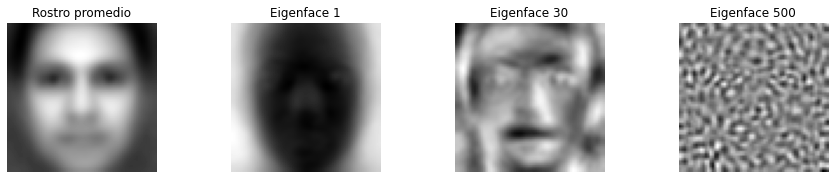

In [5]:
#Singular Value Decomposition (SVG) - Eigenfaces
Datasvd=Data.T

#Rostro promedio
media=np.mean(Datasvd,axis=1)
avgface=media.reshape((64,64))

X=Datasvd-np.tile(media.reshape(media.size,1),Datasvd.shape[1])
U,S,VT=np.linalg.svd(X,full_matrices=0)

plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(avgface,cmap='gray'),plt.title('Rostro promedio'),plt.axis('off')
plt.subplot(142),plt.imshow(np.reshape(U[:,1],(64,64)),cmap='gray'),plt.title('Eigenface 1'),plt.axis('off')
plt.subplot(143),plt.imshow(np.reshape(U[:,30],(64,64)),cmap='gray'),plt.title('Eigenface 30'),plt.axis('off')
plt.subplot(144),plt.imshow(np.reshape(U[:,500],(64,64)),cmap='gray'),plt.title('Eigenface 500'),plt.axis('off')

(<matplotlib.axes._subplots.AxesSubplot at 0x2bfceaccb20>,
  ...],
 None,
 Text(0.5, 1.0, 'Suma acumulativa de eigenvalores (normalizada)'))

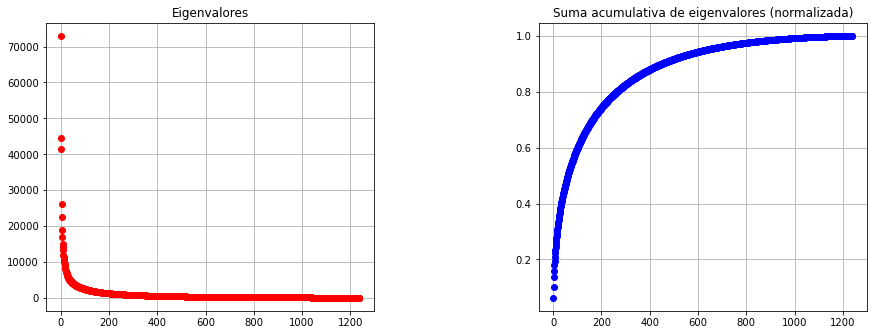

In [9]:
#Evaluación de eigenvalores significativos - Reducción de dimensionalidad
Sr=S.reshape(1,S.size)
Sac=np.empty((1,Sr.size)) #Arreglo que almacena suma acumulativa de eigenvalores

sprev=0
for x in range(0,S.size):
    Sac[0,x]=sprev+Sr[0,x]
    sprev=Sac[0,x]
    x=x+1

Sac=Sac/np.sum(Sr) #Normalización de arreglo Sac
    
nev=np.linspace(1,1238,num=1238,endpoint=True)
nev=nev.reshape(1,nev.size)

plt.subplots_adjust(top=3,bottom=2,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(121),plt.plot(nev,Sr,'or'),plt.grid(),plt.title('Eigenvalores')
plt.subplot(122),plt.plot(nev,Sac,'ob'),plt.grid(),plt.title('Suma acumulativa de eigenvalores (normalizada)')

<p style="text-align:justify">A partir del diagrama acumulativo, se observa que es posible obtener alrededor del 95% de confianza en los resultados al considerar los primeros 600 eigenvalores. Lo anterior significa una reducción considerable en el gasto computacional, pues se requerirían sólo la mitad de las características originales para generar un resultado con una buena aproximación al ejemplar real.<br><br>
Es importante aclarar que esta reducción de dimensionalidad se puede entender como un método para comprimir las imágenes. El PCA es un tipo de extractor de características, en donde las nuevas características son estadísticamente independientes entre sí y se generan a partir de una combinación (lineal o no lineal) de las originales. En este caso, lo que se está haciendo al reducir las dimensiones es reducir el número de variables de las cuales depende cada característica calculada por el extractor sin perjudicar significativamente el rendimiento del mismo.</p>

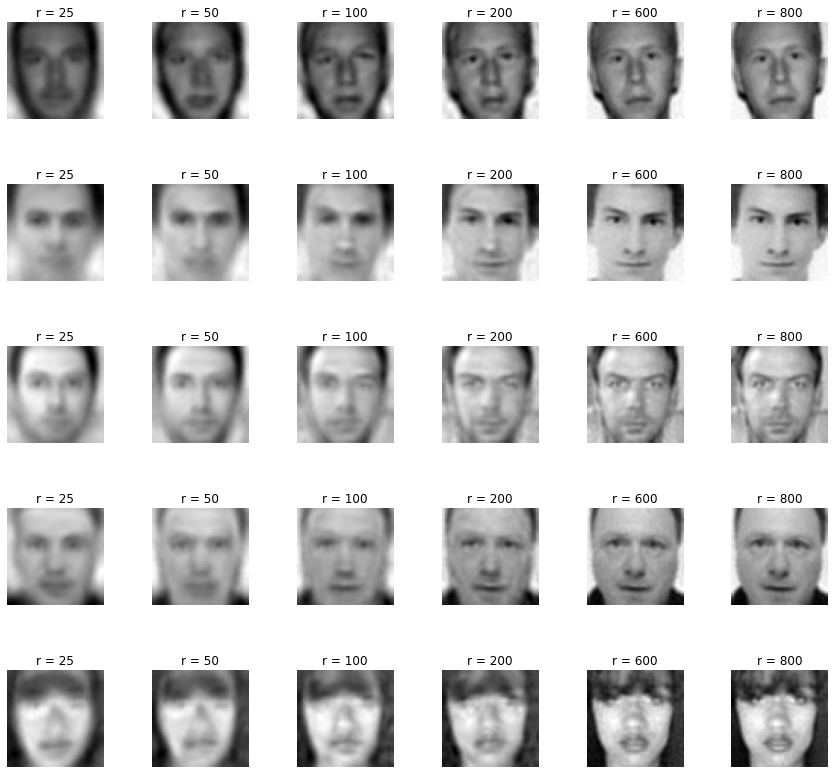

In [302]:
#Evaluación de reducción
tests=[]

with os.scandir('test/') as nms:    
    for nm in nms:
        test=cv2.imread('test/'+nm.name,0)
        test=cv2.GaussianBlur(test,(3,3),0)
        tcent=test.reshape(4096,1)-media.reshape(media.size,1)
        tests.append(tcent)

plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

trunc=[25,50,100,200,600,800]

x=1
for test in tests:
    for r in trunc:
        recface = media.reshape(media.size,1) + U[:,:r] @ U[:,:r].T @ test
        plt.subplot(len(tests),6,x),plt.imshow(recface.reshape(64,64),cmap='gray'),plt.axis('off'),plt.title("r = "+str(r))
        x=x+1

<p style="text-align:justify">Se observa con claridad que, para cada ejemplar, la imagen aproximada permite reconocer con suficiente claridad a la persona al considerar los primeros 600 eigenvectores como base para el espacio de representación.</p>